<a href="https://colab.research.google.com/github/Nagesh2003/Nagesh-works/blob/main/MlAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🔵 What is a Contingency Table?

A contingency table is a type of table in a matrix format that displays the frequency distribution
of the variables. They are heavily used in statistics to study the correlation between categorical variables.


🔵 Sample Data Generated:
   Gender Preference
0    Male      Green
1  Female       Blue
2    Male       Blue
3    Male       Blue
4    Male       Blue

🔵 Creating Contingency Table...

Preference  Blue  Green  Red
Gender                      
Female        12     22   22
Male          14     17   13

🔵 Visualizing the Contingency Table...



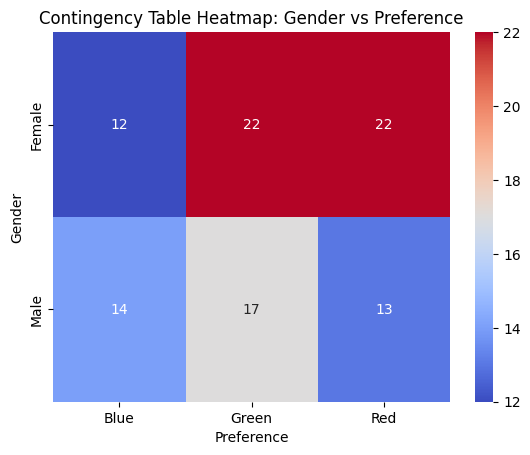


🔵 Performing Chi-Square Test...

Chi2 Statistic: 1.6935
P-Value: 0.4288
Degrees of Freedom: 2

Expected Frequencies:
Preference   Blue  Green   Red
Gender                        
Female      14.56  21.84  19.6
Male        11.44  17.16  15.4

🔵 Interpretation:

✅ Conclusion: There is **NO significant relationship** between Gender and Preference.

🔵 Assignment Completed Successfully.



In [1]:
# CONTINGENCY TABLE - ADVANCED ASSIGNMENT
# Author: [Your Name]
# Date: [Today's Date]

import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------- INTRODUCTION -----------------
print("\n🔵 What is a Contingency Table?")
print("""
A contingency table is a type of table in a matrix format that displays the frequency distribution
of the variables. They are heavily used in statistics to study the correlation between categorical variables.
""")

# ----------------- DATA CREATION -----------------
np.random.seed(42)  # for reproducibility

# Define categories
genders = ['Male', 'Female']
preferences = ['Red', 'Blue', 'Green']

# Generate random data
n_samples = 100
data = {
    'Gender': np.random.choice(genders, n_samples),
    'Preference': np.random.choice(preferences, n_samples)
}

df = pd.DataFrame(data)

print("\n🔵 Sample Data Generated:")
print(df.head())

# ----------------- CONTINGENCY TABLE -----------------
print("\n🔵 Creating Contingency Table...\n")
contingency_table = pd.crosstab(df['Gender'], df['Preference'])
print(contingency_table)

# ----------------- VISUALIZATION -----------------
print("\n🔵 Visualizing the Contingency Table...\n")
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Contingency Table Heatmap: Gender vs Preference')
plt.ylabel('Gender')
plt.xlabel('Preference')
plt.show()

# ----------------- CHI-SQUARE TEST -----------------
print("\n🔵 Performing Chi-Square Test...\n")
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# ----------------- CONCLUSION -----------------
print("\n🔵 Interpretation:")

if p < 0.05:
    print("\n✅ Conclusion: There is a **significant relationship** between Gender and Preference.")
else:
    print("\n✅ Conclusion: There is **NO significant relationship** between Gender and Preference.")

print("\n🔵 Assignment Completed Successfully.\n")


🔵 Dataset Head:
       sex  class
0    male  Third
1  female  First
2  female  Third
3  female  First
4    male  Third

🔵 Contingency Table:
 class   First  Second  Third
sex                         
female     94      76    144
male      122     108    347

🔵 Row-wise Percentages (%):
 class   First  Second  Third
sex                         
female  29.94   24.20  45.86
male    21.14   18.72  60.14

🔵 Column-wise Percentages (%):
 class   First  Second  Third
sex                         
female  43.52    41.3  29.33
male    56.48    58.7  70.67


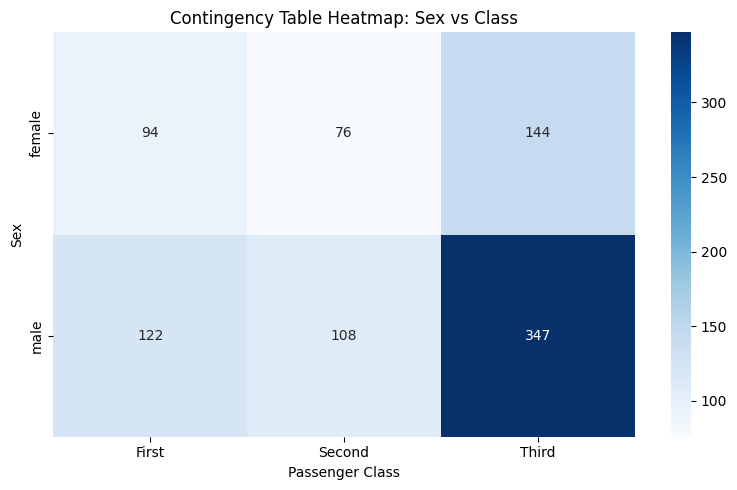

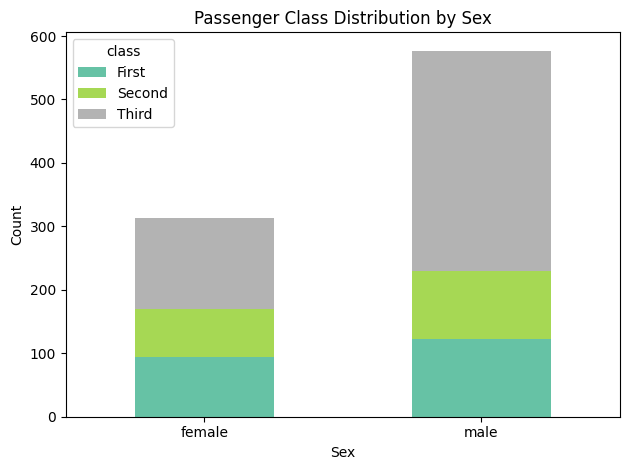


🔵 Chi-Square Test Results:
Chi2 Statistic = 16.9715
P-value = 0.0002
Degrees of Freedom = 2

🔵 Expected Frequencies:
class        First      Second       Third
sex                                       
female   76.121212   64.843996  173.034792
male    139.878788  119.156004  317.965208

🔵 Cramér's V (Effect Size): 0.1380

✅ Files exported to 'output/'


In [2]:
# CONTINGENCY TABLE ANALYSIS - ADVANCED LEVEL
# Dataset: Titanic (from seaborn)
# Author: [Your Name] - Advanced Statistical Assignment

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import os

# ------------------ LOAD DATA ------------------

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Use 'sex' and 'class' for categorical analysis
df = df[['sex', 'class']].dropna()

print("🔵 Dataset Head:\n", df.head())

# ------------------ CONTINGENCY TABLE ------------------

contingency_table = pd.crosstab(df['sex'], df['class'])

print("\n🔵 Contingency Table:\n", contingency_table)

# ------------------ ROW & COLUMN PERCENTAGES ------------------

# Row percentages
row_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
print("\n🔵 Row-wise Percentages (%):\n", row_percent.round(2))

# Column percentages
col_percent = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100
print("\n🔵 Column-wise Percentages (%):\n", col_percent.round(2))

# ------------------ HEATMAP ------------------

plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title("Contingency Table Heatmap: Sex vs Class")
plt.ylabel("Sex")
plt.xlabel("Passenger Class")
plt.tight_layout()
plt.show()

# ------------------ BAR PLOT ------------------

contingency_table.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Passenger Class Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ------------------ CHI-SQUARE TEST ------------------

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\n🔵 Chi-Square Test Results:")
print(f"Chi2 Statistic = {chi2:.4f}")
print(f"P-value = {p:.4f}")
print(f"Degrees of Freedom = {dof}")
print("\n🔵 Expected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# ------------------ CRAMÉR'S V ------------------

def cramers_v(table):
    chi2 = stats.chi2_contingency(table)[0]
    n = table.sum().sum()
    phi2 = chi2 / n
    r, k = table.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

cramer_v = cramers_v(contingency_table)
print(f"\n🔵 Cramér's V (Effect Size): {cramer_v:.4f}")

# ------------------ EXPORT TO FILES ------------------

output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

contingency_table.to_csv(os.path.join(output_dir, "contingency_table.csv"))
row_percent.to_excel(os.path.join(output_dir, "row_percentages.xlsx"))
col_percent.to_excel(os.path.join(output_dir, "column_percentages.xlsx"))

print(f"\n✅ Files exported to '{output_dir}/'")
